# Exploratory Data Analysis

## Smish Dataset

> Fetch data 

In [6]:
!wget  https://data.mendeley.com/public-files/datasets/f45bkkt8pr/files/edb361de-918d-469f-9106-e84823830665/file_downloaded -O ../data/raw/smish/Dataset_5971.zip

--2025-12-01 12:57:36--  https://data.mendeley.com/public-files/datasets/f45bkkt8pr/files/edb361de-918d-469f-9106-e84823830665/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/c8bedf6a-4e33-4d02-b30b-82702ba67f88 [following]
--2025-12-01 12:57:36--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/c8bedf6a-4e33-4d02-b30b-82702ba67f88
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.66.147, 52.92.17.114, 52.92.4.58, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.66.147|:443... co

200 OK
Length: 244698 (239K) [application/zip]
Saving to: ‘../data/raw/smish/Dataset_5971.zip’

../data/raw/smish/D 100%[===================>] 238.96K  --.-KB/s    in 0.03s   

2025-12-01 12:57:36 (7.30 MB/s) - ‘../data/raw/smish/Dataset_5971.zip’ saved [244698/244698]



In [ ]:
import pandas as pd
import zipfile
import os

zipref =  zipfile.ZipFile('../data/raw/smish/Dataset_5971.zip', 'r')
zipref.extractall('../data/raw/smish/')
zipref.close()

In [37]:
# Load mendelay smishing dataset

mendeley_df = pd.read_csv('../data/raw/smish/Dataset_5971.csv')
mendeley_df.head()

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No


In [38]:
mendeley_df.shape

(5971, 5)

In [39]:
mendeley_df.describe()

,LABEL,TEXT,URL,EMAIL,PHONE
count,5971,5971,5971,5971,5971
unique,5,5949,2,2,2
top,ham,Is there coming friday is leave for pongal?do ...,No,No,No
freq,4844,2,5764,5952,5127


In [40]:
mendeley_df = mendeley_df[['TEXT', 'LABEL']]

In [41]:
mendeley_df.head()

,TEXT,LABEL
0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,ham
1,What's up? Do you want me to come online? If y...,ham
2,So u workin overtime nigpun?,ham
3,"Also sir, i sent you an email about how to log...",ham
4,Please Stay At Home. To encourage the notion o...,Smishing


In [42]:
mendeley_df.dropna(inplace=True)

<Axes: xlabel='LABEL'>

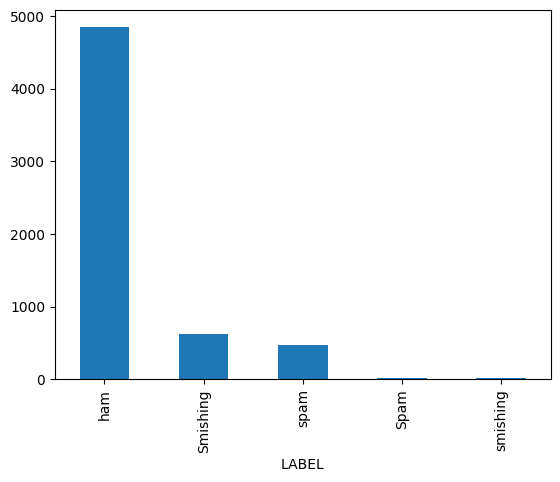

In [43]:
# Label distribution
mendeley_df['LABEL'].value_counts().plot(kind='bar')

In [44]:
# adjust labels
mendeley_df['LABEL'] = mendeley_df['LABEL'].replace({'Spam':'spam', 'Smishing':'smish',  'smishing':'smish'})

In [45]:
mendeley_df['LABEL'].value_counts()

LABEL
ham      4844
smish     638
spam      489
Name: count, dtype: int64

<Axes: >

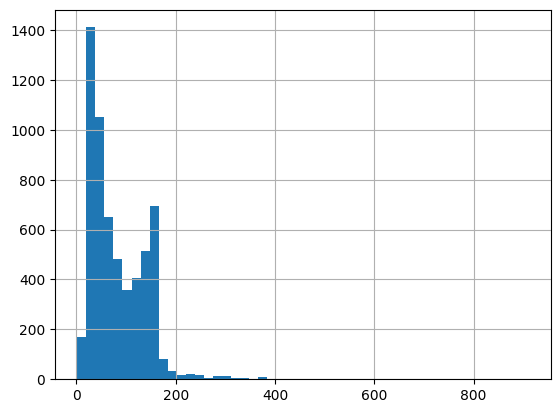

In [46]:
# Text length distribution
mendeley_df['text_length'] = mendeley_df['TEXT'].apply(len)
mendeley_df['text_length'].hist(bins=50)

In [47]:
mendeley_df['text_length'].describe()

count    5971.000000
mean       83.239826
std        58.681945
min         2.000000
25%        38.000000
50%        66.000000
75%       127.000000
max       910.000000
Name: text_length, dtype: float64